In [1]:
%matplotlib inline
import random as r
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import scipy

In [36]:

    
def trade_with_savings(m_i,m_j,l):
    m_i_prime = -1
    m_j_prime = -1

    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        m_i_prime = l*m_i + epsilon*(1-l)*(m_i+m_j)
        m_j_prime = l*m_j + (1-epsilon)*(1-l)*(m_i+m_j)
        

    return m_i_prime, m_j_prime

def transaction_tax(money_exchanged,agents,tax_rate):
    pop = len(agents)
    distributed_money = money_exchanged*tax_rate/pop
    agents = [agent+distributed_money for agent in agents]
    
    return agents

def trade_with_taxation(m_i,m_j,agents,tax_rate):
    m_i_prime = -1
    m_j_prime = -1
    pop = len(agents)
    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        delta_m = epsilon*m_j - (1-epsilon)*m_i
        delta_m, projected_tax = (1-tax_rate)*delta_m, tax_rate*delta_m
        m_i_prime = m_i + delta_m
        m_j_prime = m_j - delta_m
        
    distributed_money = projected_tax/pop
    agents = [agent+projected_tax for agent in agents]    

    return m_i_prime, m_j_prime, agents

def choose_agents(n):
    i1 = r.randint(0,n-1)
    i2 = r.randint(0,n-1)
    return i1, i2

def consensual_transaction(mi,mj,alpha):
    try:
        roll = r.uniform(0,1)
        p = ((abs(mi-mj))**(-alpha))
        if roll <= p:
            return True
        else:
            return False
    except ZeroDivisionError:
        return False
    
def consensual_transaction_past_transactions(mi,mj,alpha,c,gamma):
    try:
        roll = r.uniform(0,1)
        p = ((abs(mi-mj))**(-alpha))*(c+1)**(gamma)
        if roll <= p:
            return True
        else:
            return False
    except ZeroDivisionError:
        return False
    
def trade(m_i,m_j):
    m_i_prime = -1
    m_j_prime = -1

    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        m_i_prime = epsilon*(m_i+m_j)
        m_j_prime = (1-epsilon)*(m_i+m_j)
        
    delta_m = epsilon*m_j

    return m_i_prime, m_j_prime

def iterate(transactions, agents):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade(agent1,agent2)
        
def iterate_with_savings(runs, agents, l):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade_with_savings(agent1,agent2,l)
        
def iterate_nearest_neighbor(runs, agents, a):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0 or consensual_transaction(agent1,agent2,a) == False:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade(agent1,agent2)
        
def flat_income_tax(tax_rate, agents):
    bank = 0
    for agent in agents:
        income_tax = tax_rate*agent
        
    
        
        
def iterate_nearest_neighbor_with_taxation(runs, agents, a, tax_rate):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0 or consensual_transaction(agent1,agent2,a) == False:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2], agents = trade_with_taxation(agent1,agent2,agents, tax_rate)
        
def iterate_nearest_neighbor_past_transactions(runs, agents, a, gamma, ledger):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        c = ledger[i1][i2]
        while agent1 < 0 or agent2 < 0 or consensual_transaction_past_transactions(agent1,agent2,a,c,gamma) == False:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade(agent1,agent2)
        ledger[i1][i2] += 1
        

def power_fit(distribution, beta):
    w_arr = []
    x = np.linspace(0,max(distribution))
    for m in x:
        wn = beta*math.exp(-m*beta)
        w_arr.append(wn)
    return x, w_arr


def check_conservation(agents):
    money = 0
    for a in agents:
        money += a.money
    return money


def plot_fit(x,fit):
    plt.plot(x,fit)
    plt.xlabel("Range of wealth")
    plt.ylabel("1/wealth, W_n")
    plt.title("Gibbs Distribution")

def gaussian_fit(distribution,bins):
    mu, sigma = scipy.mean(distribution), scipy.std(distribution)
    y = mlab.normpdf(bins,mu,sigma)
    #bars, bins, patches = plt.hist(distribution, 50,normed=True)
    return y

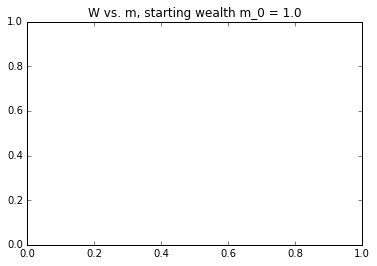

In [22]:
'''Initialize'''
alpha = 1
agent_no = 500
transactions = 10**6
money = 1.0
beta = 1/money
m_0 = money*agent_no
agents = np.full(agent_no,money)
'''Iterate'''
iterate(transactions, agents)
'''See fit'''
distribution = agents
x, fit = power_fit(distribution, beta, m_0)


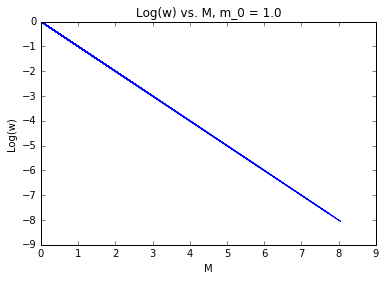

In [9]:
w_array = np.zeros(len(distribution))
logw_array = np.zeros(len(distribution))
beta = 1/money
for i in range(len(distribution)):
    m = distribution[i]
    w_m = beta*math.exp(-beta*m)
    w_array[i] = w_m
    logw = math.log(w_m)
    logw_array[i] = logw
    
plt.plot(distribution,logw_array)
plt.xlabel("M")
plt.ylabel("Log(w)")
plt.title("Log(w) vs. M, m_0 = 1.0")
    
    

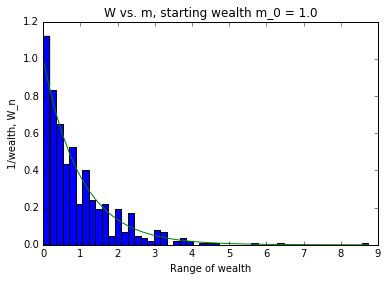

In [23]:
bars, bins, patches = plt.hist(distribution, 50, normed=True)
plot_fit(x,fit)
plt.title("W vs. m, starting wealth m_0 = {}".format(money))

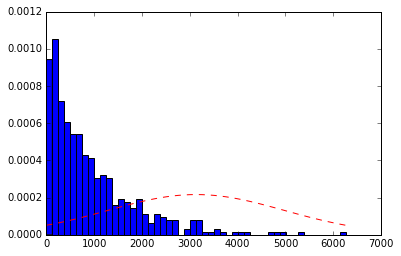

In [11]:
mu, sigma = scipy.mean(bins), scipy.std(bins)
y = mlab.normpdf(bins,mu,sigma)
bars, bins, patches = plt.hist(distribution, 50,normed=True)
l = plt.plot(bins, y, 'r--', linewidth=1)


In [24]:
'''Trials for varying lambda'''

agent_no = 500
transactions = 10**5
money = 1000.0
beta = 1/money
m_0 = money*agent_no
lambda_lst = [0, .05, 0.25, 0.5, 0.9]

for l in lambda_lst:
    agents = np.full(agent_no,money)
    iterate_with_savings(transactions, agents, l)
    #distribution = agents
    x, p_fit = power_fit(agents, beta)
    counts, bins, patches = plt.hist(agents, 50, normed=True)
    #x, scaled_fit = overlay_fit(distribution,beta, max(counts))
    plt.title("Distribution of Wealth with {}% savings (lambda = {})".format(100*l,l))
    plt.xlabel("Wealth")
    plt.ylabel("Fraction of Distribution")
    g_fit = gaussian_fit(agents,bins)
    plt.plot(bins,g_fit, 'r--', linewidth=2)
    plt.show()

    #plt.plot(scaled_fit,color='red',lw=2)
    #plt.show()


TypeError: power_fit() missing 1 required positional argument: 'm_0'

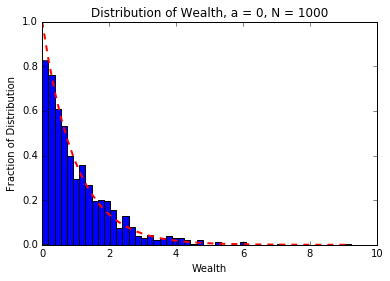

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: divide by zero encountered in double_scalars


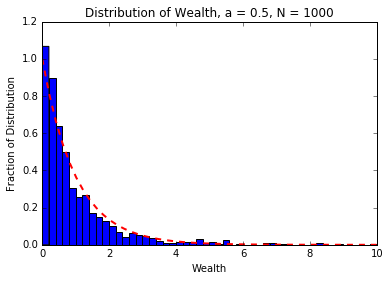

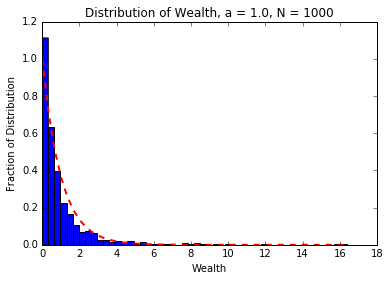

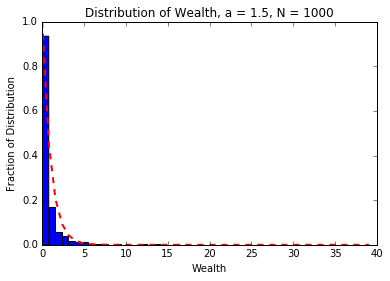

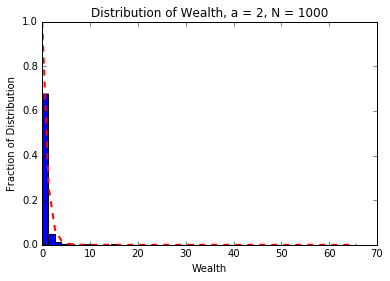

In [11]:
'''Trials for varying alpha parameter, constant lambda'''

agent_no = 1000
transactions = 10**6
money = 1.0
beta = 1/money
m_0 = money*agent_no
alpha_lst = [0,.5,1.0,1.5,2]
for a in alpha_lst:
    agents = np.full(agent_no,money)
    iterate_nearest_neighbor(transactions, agents, a)
    #distribution = agents
    x, p_fit = power_fit(agents, beta)
    counts, bins, patches = plt.hist(agents, 50, normed=True)
    #x, scaled_fit = overlay_fit(distribution,beta, max(counts))
    plt.title("Distribution of Wealth, a = {}, N = {}".format(a,agent_no))
    plt.xlabel("Wealth")
    plt.ylabel("Fraction of Distribution")
    x, p_fit = power_fit(agents,beta)
    plt.plot(x,p_fit, 'r--', linewidth=2)
    plt.show()

In [2]:
'''To do: 4d Extract the tail of
the distribution and see if it follows a Pareto distribution
wm ∝ m−1−α
.
'''

# wm = []
# for agent in agents:
#     wm.append(agent**(-1-a))
# print(wm)
# plt.plot(wm)

'To do: 4d Extract the tail of\nthe distribution and see if it follows a Pareto distribution\nwm ∝ m−1−α\n.\n'

In [73]:
'''4e: Factoring In Past Transactions
Alpha is from 1.0 to 2.0
Gamma is from 0.0 to 4.0'''

alpha_lst = [1.0,2.0]
gamma_lst = [0.0,1.0,2.0,3.0,4.0]
ledger = np.zeros((agent_no,agent_no))

agent_no = 1000
transactions = 10**6
money = 100.0
beta = 1/money
m_0 = money*agent_no
distributions = []
for a in alpha_lst:
    for g in gamma_lst:
        agents = np.full(agent_no,money)
        iterate_nearest_neighbor_past_transactions(transactions, agents, a, g, ledger)
        #x, p_fit = power_fit(agents, beta)
        #counts, bins, patches = plt.hist(agents, 50, normed=True)
        #plt.title("Distribution of Wealth, a = {}, g = {}".format(a,g))
        #plt.xlabel("Wealth")
        #plt.ylabel("Fraction of Distribution")
        x, p_fit = power_fit1(agents,beta)
        distributions.append(p_fit)
        #plt.loglog(x,p_fit, 'r--', linewidth=2)
        #plt.show()



C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: RuntimeWarning: divide by zero encountered in double_scalars


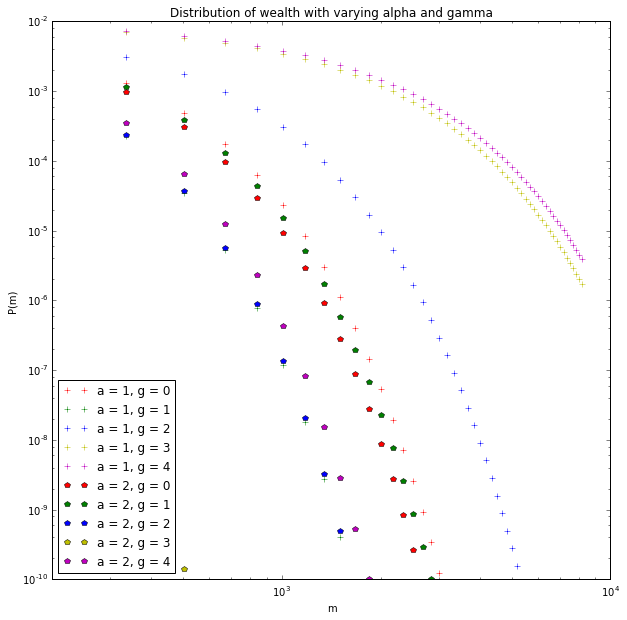

In [83]:
lines = ['r+','g+','b+','y+','m+','rp','gp','bp','yp','mp']
ag = [(1,0), (1,1), (1,2), (1,3), (1,4), (2,0), (2,1), (2,2), (2,3), (2,4)]
plt.figure(figsize=(10,10))
plt.title("Distribution of wealth with varying alpha and gamma")        
for i in range(len(distributions)):
    fit = distributions[i]
    line = lines[i]
    a, g = ag[i][0], ag[i][1]
    label = "a = {}, g = {}".format(a, g)
    plt.loglog(x,fit,line,label=label)

plt.xlabel('m')
plt.ylabel('P(m)')
plt.xlim(2*10**(2),10**4)
plt.ylim(10**(-10),10**(-2))
plt.legend(loc=0)
plt.show()

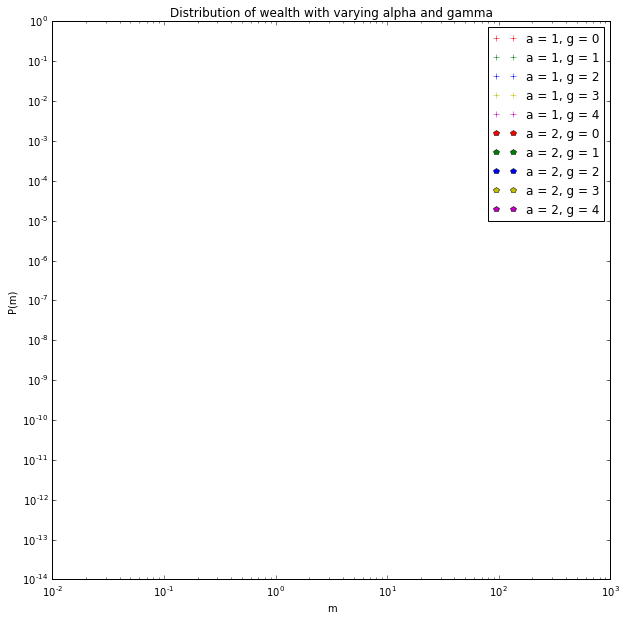

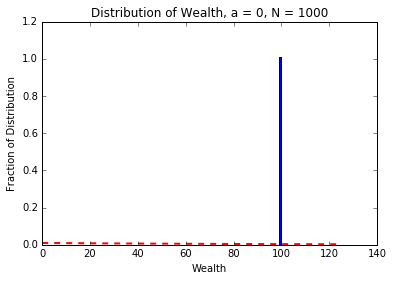

initial: 100000.0 final: 100000.0


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:58: RuntimeWarning: divide by zero encountered in double_scalars


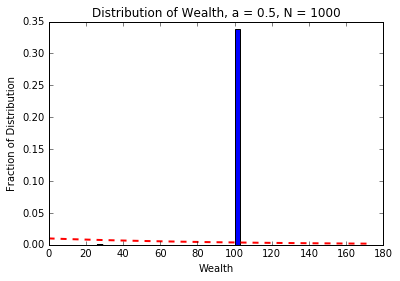

initial: 100000.0 final: 100000.0


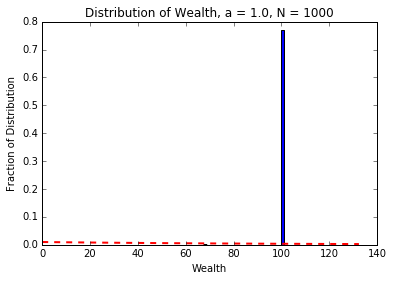

initial: 100000.0 final: 100000.0


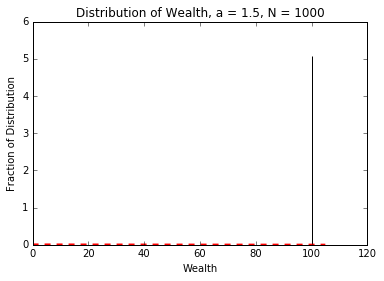

initial: 100000.0 final: 99999.99999999999


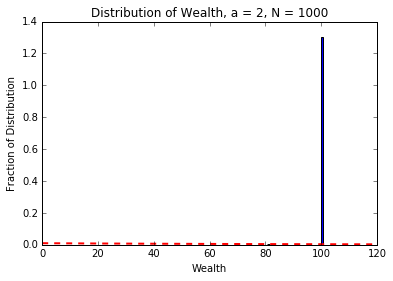

initial: 100000.0 final: 100000.0


In [38]:
#Taxation model

'''Trials for varying alpha parameter, constant lambda'''

agent_no = 1000
transactions = 10**5
money = 100.0
beta = 1/money
m_0 = money*agent_no
alpha_lst = [0,.5,1.0,1.5,2]
initial_wealth = money*agent_no
tax_rate=0.2
for a in alpha_lst:
    agents = np.full(agent_no,money)
    iterate_nearest_neighbor_with_taxation(transactions, agents, a, tax_rate)
    #distribution = agents
    x, p_fit = power_fit(agents, beta)
    counts, bins, patches = plt.hist(agents, 50, normed=True)
    #x, scaled_fit = overlay_fit(distribution,beta, max(counts))
    plt.title("Distribution of Wealth, a = {}, N = {}".format(a,agent_no))
    plt.xlabel("Wealth")
    plt.ylabel("Fraction of Distribution")
    x, p_fit = power_fit(agents,beta)
    plt.plot(x,p_fit, 'r--', linewidth=2)
    plt.show()
    final_wealth = sum(agents)
    print("initial: {} final: {}".format(initial_wealth,final_wealth))